In [1]:
from megaunidec import *
from unidec_modules import unidectools as ud

In [2]:
mega = MegaUniDec()


UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


Reading mzML: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done


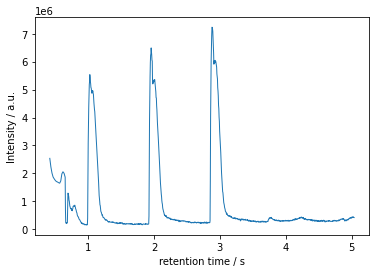

In [3]:
mega.import_mzml("C:\\Users\\cm19ljc\\Documents\\GitHub\\UniDec\\mzML\\mzML.mzML")

In [4]:
mega.define_peaks(62, 56, 3)
mega.extract_peaks()


[62, 118, 174]
Getting scans: [86, 125]
Length merge axis: 28915
Getting scans: [311, 350]
Length merge axis: 30293
Getting scans: [535, 574]
Length merge axis: 31342


In [5]:
mega.to_hdf5()

C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.hdf5 created


In [6]:
meta = mega.to_meta()

In [7]:
# -- Data processing 
meta.config.subtype = 2 # background subtraction - subtract curved
meta.config.subbuff = 100 # background subtraction amount(subtract curved) 0 = 0ff, 100 = good amount when on
meta.config.datanorm = 0 # turn off data normalisation

# -- Deconvolution
meta.config.numit = 100 # number of iterations

# mass range (default = 5000.0 to 500000.0 Da)
meta.config.massub = 15000 # upper 
meta.config.masslb = 11000 # lower

meta.config.massbins = 0.1 # sample mass every 0.1 Da

# FWHM 
# eng.get_auto_peak_width()
meta.config.mzsig = 0 

# charge range
meta.config.startz = 1
meta.config.endz = 20

# smoothing 
meta.config.zzsig = 1 # charge smooth width (smooth charge state distributions)
meta.config.psig = 1 # smooth nearby points (point smooth width, some = 1)
meta.config.beta = 0 # suppress artifacts (beta, some = 50)

meta.config.psfun = 0 # Peak shape function (gaussian, lorentzian, split G/L)

# -- Peak Selection and plotting
meta.config.peaknorm = 0 # Normalise peaks (0 = off)
meta.config.datanorm = 0
meta.config.peakwindow = 100 # peak window / Da
meta.config.exnorm = 0 # extract normalisation
meta.config.peakthresh = 0.05
meta.config.nativeub = 10
meta.config.nativelb = -10
meta.config.write_hdf5()

In [8]:
meta.config.hdf_file

'C:\\Users\\cm19ljc\\Documents\\GitHub\\UniDec\\mzML\\mzML.hdf5'

In [9]:
meta.config.write_hdf5()

array([[11000.    ,  6190.228 ],
       [11000.1   ,  7894.79  ],
       [11000.2   ,  9614.239 ],
       ...,
       [14999.7   ,  1926.4391],
       [14999.8   ,  1664.0022],
       [14999.9   ,  1403.5813]], dtype=float32)

In [10]:
meta.process_data()

Execution Time: 0.07461189999999984


In [11]:
meta.run_unidec()

Execution Time: 1.4442443000000003


In [12]:
meta.config.peaknorm = 0
meta.pick_peaks()

Execution Time: 0.0877920999999997
Peak info saved to: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\UniDec_Figures_and_Files\mzML_extracts.txt


In [13]:
# peaks
mass = []
height = []
extracts = []
for i, p in enumerate(meta.pks.peaks):
    mass.append(p.mass)
    height.append(p.height)
    

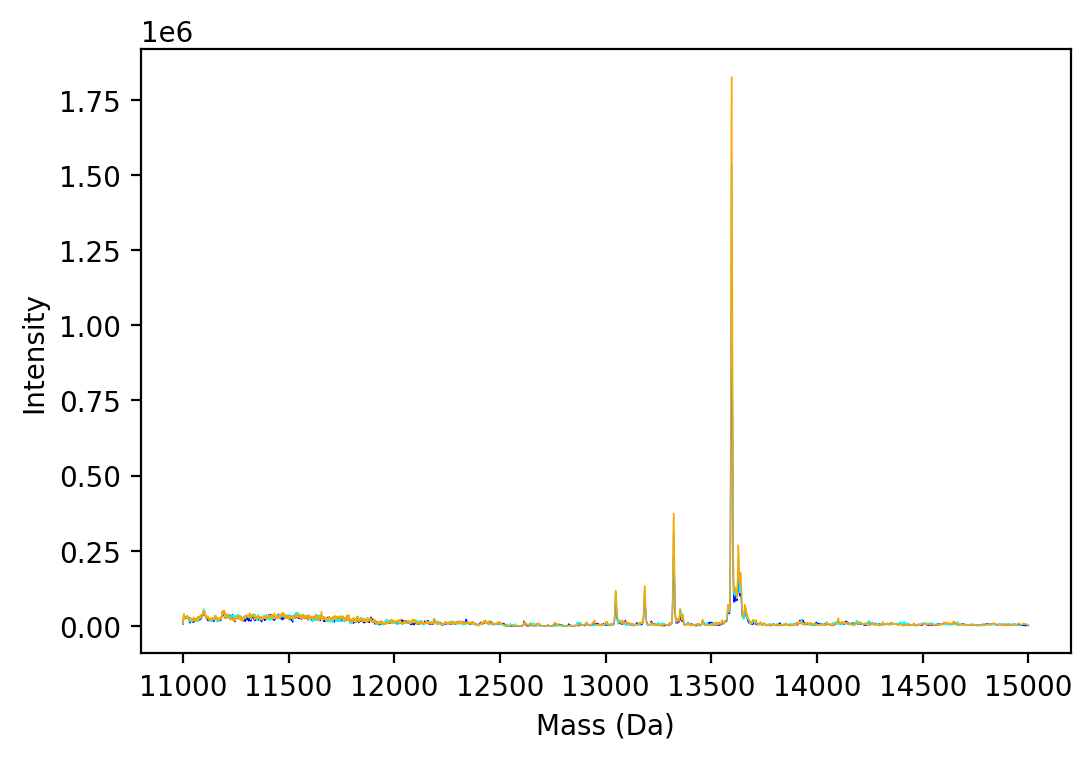

In [14]:
spectra = meta.data.get_spectra()

if len(spectra) > meta.config.crossover:
        mult = int(len(spectra) / meta.config.numtot)
else:
    mult = 1

color = ['blue', 'cyan', 'orange']

fig, ax = plt.subplots(dpi = 200)
for i, s in enumerate(spectra[::mult]):
    
    ax.plot(s.massdat[:, 0], s.massdat[:, 1], color = color[i],lw = 0.5)
    ax.set_xlabel('Mass (Da)')
    ax.set_ylabel("Intensity")
    
# for i, p in enumerate()
# ax.scatter(mass, height)
# plt.show()

In [15]:
for i, p in enumerate(meta.pks.peaks):
    print(p.mass, p.height)
    
print(meta.pks.norm)

13047.2 121803.65
13184.3 139084.8
13321.6 366453.34
13595.5 1825582.2
1


In [16]:
meta.data.var1 = np.array([0, 1, 2])
var1 = meta.data.var1

fitgrid = meta.data.exgrid # (peak.extracts)
ignore = meta.data.get_bool()

A [ 74322.52 113525.6  117581.12] ○
121803.65
B [ 96761.93 118583.23 133416.62] ▽
139084.8
C [237379.94 307972.   373537.25] △
366453.34
D [1217299.4 1534880.1 1825595.1] ▷
1825582.2


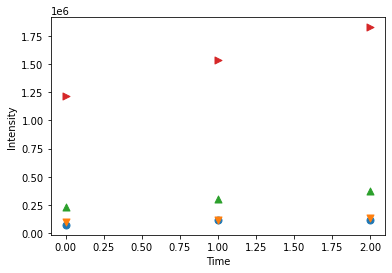

In [17]:
for i, p in enumerate(meta.pks.peaks):
    print(meta.pks.peaks[i].label, fitgrid[i], meta.pks.textmarkers[i])
    plt.scatter(var1, fitgrid[i], marker = meta.pks.markers[i])
    plt.ylabel("Intensity")
    plt.xlabel("Time")
    print(meta.pks.peaks[i].height)
plt.show()


In [18]:
for i in meta.pks.peaks:
    print(i.mass, i.height)

13047.2 121803.65
13184.3 139084.8
13321.6 366453.34
13595.5 1825582.2


In [19]:
masslist = []
heightlist = []
for i, p in enumerate(meta.pks.peaks):
    print(fitgrid[i])
    print(meta.pks.textmarkers[i])
    print(meta.pks.markers[i])
    print(meta.pks.peaks[i].label)

[ 74322.52 113525.6  117581.12]
○
o
A
[ 96761.93 118583.23 133416.62]
▽
v
B
[237379.94 307972.   373537.25]
△
^
C
[1217299.4 1534880.1 1825595.1]
▷
>
D


In [90]:
spectra = meta.data.get_spectra()

spectra

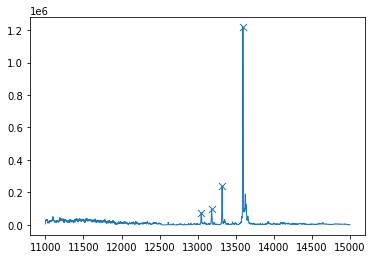

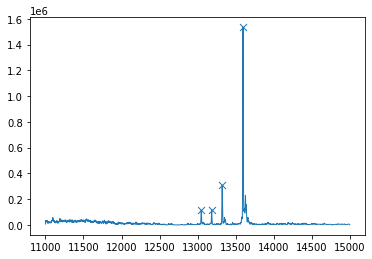

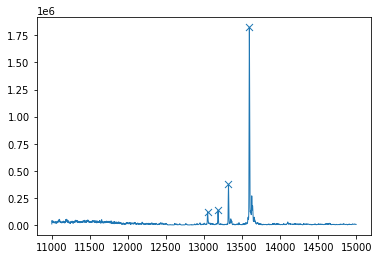

In [93]:
for s in meta.data.spectra:
    height = []
    mass = []
    for p in s.pks.peaks:
        height.append(p.height)
        mass.append(p.mass)
        print(p.marker)
    plt.figure()
    plt.plot(s.massdat[:, 0], s.massdat[:, 1])
    plt.scatter(mass, height, marker = 'x')

In [98]:
test1 = 3
test2 = 2

if test1 and test2 != None:
    print('pass')

pass
